## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [2]:
data = pd.read_csv("E:\Linear Regression\train.csv")

**A little bit of data exploration**

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info() #as we can see, the y columns has 699 entries i.e. it has one null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


## Data Preprocessing

#### Handling NULL Value

In [5]:
data = data.dropna() #drop na entry
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [6]:
data.info() #now, both x, y has 699 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### Splitting data

In [7]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color = "green">Linear Regression</font>

### Training model

In [8]:
# using sklearn library
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(train_input, train_output)

LinearRegression()

### Predicting Test_input

We have done with our training part,

1) In the above step, our model has been trained according to both training input and training output values,

Now, it is time to test our model, but first

2) Before testing , we have to feed testing input values to predict value.

3) And when our model will predict values, that predicted values will be compared to the actual testing output values.

In [9]:
predicted_value = linear_regressor.predict(test_input)

In [13]:
predicted_value

array([[ 4.76896187],
       [60.82492252],
       [46.81093236],
       [97.86189652],
       [29.7939443 ],
       [62.82692111],
       [-0.23603461],
       [99.86389511],
       [17.78195274],
       [29.7939443 ],
       [97.86189652],
       [15.77995414],
       [21.78594992],
       [54.81892673],
       [42.80693517],
       [74.83891268],
       [90.85490143],
       [45.80993306],
       [84.84890565],
       [54.81892673],
       [35.79994009],
       [48.81293095],
       [93.85789933],
       [42.80693517],
       [21.78594992],
       [36.80093938],
       [23.78794852],
       [94.85889862],
       [60.82492252],
       [74.83891268],
       [67.8319176 ],
       [57.82192463],
       [ 4.76896187],
       [52.81692814],
       [79.84390916],
       [82.84690706],
       [24.78894782],
       [33.79794149],
       [25.78994711],
       [89.85390214],
       [59.82392322],
       [48.81293095],
       [18.78295203],
       [91.85590073],
       [28.79294501],
       [ 7

In [14]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

1) we can clearly see that predicted values for first 3 lines are 4.76896187, 60.82492252,46.81093236

2) the test output for first 3 lines are 7.68202459, 61.01858089, 53.60562216

3) we can clearly see the difference , the values are not same.

4) Lets find how much error the model has??

In [10]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(predicted_value, test_output)

In [11]:
#this means that our model has 8.03 error or 92% of accuracy which is good
error

8.030031591835371

## Visualising the model performance

In order to visualize the model performance:

1) first we will plot original hypothesis and 

2) then the hypothesis which my model has predicted.

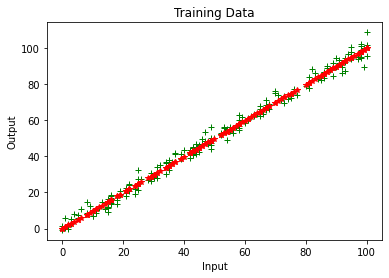

In [15]:
#original hypothesis
plt.plot(test_input, test_output, '+', color = 'green')

#model hypothesis
#plt.plot(test_input, linear_regressor.predict(test_input), '*', color= 'red')
plt.plot(test_input, predicted_value, '*', color= 'red')

plt.title("Training Data")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

** Most popular way **